In [2]:
!pip install sacremoses==0.0.53

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 880.6/880.6 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895239 sha256=e847ff5820309392515d1a5f78d57b8b79d7a5487f64034d0fbaafd4748233c3
  Stored in directory: /root/.cache/pip/wheels/00/24/97/a2ea5324f36bc626e1ea0267f33db6aa80d157ee977e9e42fb
Successfully built sacremoses


In [4]:
!pip install datasets transformers
from transformers import pipeline
from datasets import load_dataset

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.8 MB/s eta 0:00:00


In [5]:
xsum_dataset = load_dataset("xsum", version="1.2.0" )
xsum_dataset

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/datasets/load.py:1461: FutureWarning: The repository for xsum contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/xsum
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


Generating train split:   0%|          | 0/204045 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/11332 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/11334 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['document', 'summary', 'id'],
        num_rows: 204045
    })
    validation: Dataset({
        features: ['document', 'summary', 'id'],
        num_rows: 11332
    })
    test: Dataset({
        features: ['document', 'summary', 'id'],
        num_rows: 11334
    })
})

In [7]:
xsum_sample = xsum_dataset["train"].select(range(10))
display(xsum_sample.to_pandas())

,document,summary,id
0,"The full cost of damage in Newton Stewart, one...",Clean-up operations are continuing across the ...,35232142
1,A fire alarm went off at the Holiday Inn in Ho...,Two tourist buses have been destroyed by fire ...,40143035
2,Ferrari appeared in a position to challenge un...,Lewis Hamilton stormed to pole position at the...,35951548
3,"John Edward Bates, formerly of Spalding, Linco...",A former Lincolnshire Police officer carried o...,36266422
4,Patients and staff were evacuated from Cerahpa...,An armed man who locked himself into a room at...,38826984
5,Simone Favaro got the crucial try with the las...,Defending Pro12 champions Glasgow Warriors bag...,34540833
6,"Veronica Vanessa Chango-Alverez, 31, was kille...",A man with links to a car that was involved in...,20836172
7,Belgian cyclist Demoitie died after a collisio...,Welsh cyclist Luke Rowe says changes to the sp...,35932467
8,"Gundogan, 26, told BBC Sport he ""can see the f...",Manchester City midfielder Ilkay Gundogan says...,40758845
9,The crash happened about 07:20 GMT at the junc...,A jogger has been hit by an unmarked police ca...,30358490


No charts were generated by quickchart


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_1.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_2['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

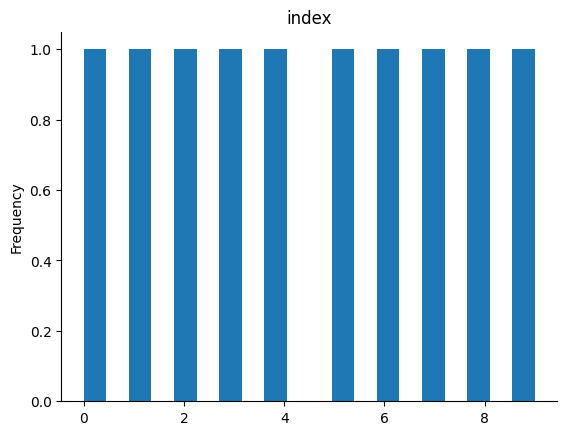

In [8]:
from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [11]:
summarizer = pipeline(task= "summarization",model = "t5-small", min_length=20, max_length=40,truncation=True)

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

In [12]:
summarizer(xsum_sample["document"][0])

[{'summary_text': 'the full cost of damage in Newton Stewart is still being assessed . many roads in peeblesshire remain badly affected by standing water . a flood alert remains in place across the'}]

In [13]:
results = summarizer(xsum_sample["document"])

In [14]:
!pip install panda

  Preparing metadata (setup.py) ... done
  Created wheel for panda: filename=panda-0.3.1-py3-none-any.whl size=7238 sha256=16f9e9e66928d21a4d9bb73c6fa669de72958a47416b47f3af4b943d42b0c87d
  Stored in directory: /root/.cache/pip/wheels/0e/8b/c3/ff9cbde1fffd8071cff8367a86f0350a1ce30a8d31b6a432e9
Successfully built panda


In [15]:
!pip install pandas

In [17]:
#Displaying Summary side by side for Comparison that with what accuracy model is generating Summary
#I am using panda to join the inputs and outputs together in a nice format.
import pandas as pd
display(pd.DataFrame.from_dict(results).rename({"summary_text":"generated_summary"},axis=1).
join(pd.DataFrame.from_dict(xsum_sample))[["generated_summary","summary","document"]])

,generated_summary,summary,document
0,the full cost of damage in Newton Stewart is s...,Clean-up operations are continuing across the ...,"The full cost of damage in Newton Stewart, one..."
1,a fire alarm went off at the Holiday Inn in Ho...,Two tourist buses have been destroyed by fire ...,A fire alarm went off at the Holiday Inn in Ho...
2,Sebastian Vettel will start third ahead of tea...,Lewis Hamilton stormed to pole position at the...,Ferrari appeared in a position to challenge un...
3,the 67-year-old is accused of committing the o...,A former Lincolnshire Police officer carried o...,"John Edward Bates, formerly of Spalding, Linco..."
4,a man receiving psychiatric treatment at the c...,An armed man who locked himself into a room at...,Patients and staff were evacuated from Cerahpa...
5,Gregor Townsend gave a debut to powerhouse win...,Defending Pro12 champions Glasgow Warriors bag...,Simone Favaro got the crucial try with the las...
6,"Veronica Vanessa Chango-Alverez, 31, was kille...",A man with links to a car that was involved in...,"Veronica Vanessa Chango-Alverez, 31, was kille..."
7,the 25-year-old was hit by a motorbike during ...,Welsh cyclist Luke Rowe says changes to the sp...,Belgian cyclist Demoitie died after a collisio...
8,gundogan will not be fit for the start of the ...,Manchester City midfielder Ilkay Gundogan says...,"Gundogan, 26, told BBC Sport he ""can see the f..."
9,the crash happened about 07:20 GMT at the junc...,A jogger has been hit by an unmarked police ca...,The crash happened about 07:20 GMT at the junc...


Sentiment Analysis Task using Bert and Poem Dataset


In [20]:
poem_dataset= load_dataset("poem_sentiment",version= "1.0.0" )
poem_sample = poem_dataset["train"].select(range(10))
display(poem_sample.to_pandas())

/usr/local/lib/python3.10/dist-packages/datasets/load.py:1461: FutureWarning: The repository for poem_sentiment contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/poem_sentiment
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


Generating train split:   0%|          | 0/892 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/105 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/104 [00:00<?, ? examples/s]

,id,verse_text,label
0,0,with pale blue berries. in these peaceful shad...,1
1,1,"it flows so long as falls the rain,",2
2,2,"and that is why, the lonesome day,",0
3,3,"when i peruse the conquered fame of heroes, an...",3
4,4,of inward strife for truth and liberty.,3
5,5,the red sword sealed their vows!,3
6,6,and very venus of a pipe.,2
7,7,"who the man, who, called a brother.",2
8,8,"and so on. then a worthless gaud or two,",0
9,9,to hide the orb of truth--and every throne,2


In [22]:
sentiment_classifier = pipeline(task = "text-classification",model="nickwong64/bert-base-uncased-poems-sentiment")

config.json:   0%|          | 0.00/923 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


tokenizer_config.json:   0%|          | 0.00/348 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/712k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

In [23]:
results  = sentiment_classifier(poem_sample['verse_text'])

In [25]:
# Display the predicted sentiment side-by-side with the gront-truth label and original text.
# the score inidicates the model's confidence in its prediction.
# Join predictions with ground_truth data
joined_data = pd.DataFrame.from_dict(results).rename({"label":"predicted_label"},axis=1).join(pd.DataFrame.from_dict(poem_sample).rename({"label":"true_label"}, axis=1))

# Changing Label Indices to Text Labels
sentiment_labels= {0:"negative",1:"Positive",2:"no_impact",3:"mixed"}
joined_data = joined_data.replace({"true_label":sentiment_labels})

# Displaying data using pandas
display(joined_data[["predicted_label","true_label","score","verse_text"]])

,predicted_label,true_label,score,verse_text
0,positive,Positive,0.996594,with pale blue berries. in these peaceful shad...
1,no_impact,no_impact,0.998741,"it flows so long as falls the rain,"
2,negative,negative,0.995966,"and that is why, the lonesome day,"
3,mixed,mixed,0.968735,"when i peruse the conquered fame of heroes, an..."
4,mixed,mixed,0.975967,of inward strife for truth and liberty.
5,mixed,mixed,0.966580,the red sword sealed their vows!
6,no_impact,no_impact,0.998639,and very venus of a pipe.
7,no_impact,no_impact,0.998611,"who the man, who, called a brother."
8,negative,negative,0.996557,"and so on. then a worthless gaud or two,"
9,no_impact,no_impact,0.998519,to hide the orb of truth--and every throne


Translation

Translationmodels may be designed for specific pairs of languages ,or they may support more than two languages. We will see both below.
Backgrond reading : SEe the Hugging FAce task page on translationor th eWikipedia page on machine translation.

In this Section I will use:
---> Data: Translation dataset from Hugging Face.
---> Models: Helsinki-NLP/opius-mt-en-es and other model that I will use is
              -> t5-small
              

In [29]:
en_to_es_translation = pipeline(task = "translation",model = "Helsinki-NLP/opus-mt-en-es")

In [30]:
en_to_es_translation("I am Enjoying , Building this application usign Models that is openly availableon Hugging Face, After learning I an gonna build applcation for End User and then \
will my Knowledge and Experience with Community")

[{'translation_text': 'Estoy disfrutando , Construyendo esta aplicación usign Modelos que está abiertamente disponible en Hugging Face , Después de aprender que voy a construir aplicaciones para el usuario final y luego mi conocimiento y experiencia con la comunidad'}]

In [32]:
# In this I am using other model t5-small model from Google
#this is the Error I get while usign only translation task ### /local/lib/python3.10/dist-packages/transformers/pipelines/__init__.py:1086: UserWarning: "translation" task was used, instead of "translation_XX_to_YY", defaulting to "translation_en_to_de"
 # warnings.warn(
#[{'translation_text': 'existierende, Open-Source-Modelle (und proprietäre) acan be used out-of-the-box for many applications'}]###

t5_small_translation= pipeline(task="text2text-generation",model="t5-small", max_length= 50)
t5_small_translation("translate Englis to French: Existing, Open-source(and proprietary) models acan be used out-of-the-box for many applications")

[{'generated_text': 'Les modèles existants, Open-Source (et propriétaires) peuvent être utilisés hors-la-box pour de nombreuses applications'}]

In [33]:
t5_small_translation("translate Englis to Romaninan: Existing, Open-source(and proprietary) models acan be used out-of-the-box for many applications")

[{'generated_text': 'Englis to Romaninan: Existing, Open-Source(und proprietary) models acan be used out-of-the-box for many applications'}]